<a href="https://colab.research.google.com/github/LindsClar/SpringOne/blob/main/Ultimate_data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import json
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df_1 = pd.read_json('/content/logins.json', lines=False)

In [3]:
df_2 = pd.read_json('/content/ultimate_data_challenge.json', lines=False)

#**This is the first requirement of the Ultimate data Challenge**  

Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­ minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [4]:
df_1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df_1.shape

(93142, 1)

In [6]:
df_1['timestamp'] = pd.to_datetime(df_1['login_time'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df_1.set_index('timestamp', inplace=True)

In [8]:
login_counts = df_1.resample('15T').size().reset_index(name='login_count')

In [9]:
print(login_counts)

               timestamp  login_count
0    1970-01-01 20:00:00            2
1    1970-01-01 20:15:00            6
2    1970-01-01 20:30:00            9
3    1970-01-01 20:45:00            7
4    1970-01-01 21:00:00            1
...                  ...          ...
9783 1970-04-13 17:45:00            5
9784 1970-04-13 18:00:00            5
9785 1970-04-13 18:15:00            2
9786 1970-04-13 18:30:00            7
9787 1970-04-13 18:45:00            6

[9788 rows x 2 columns]


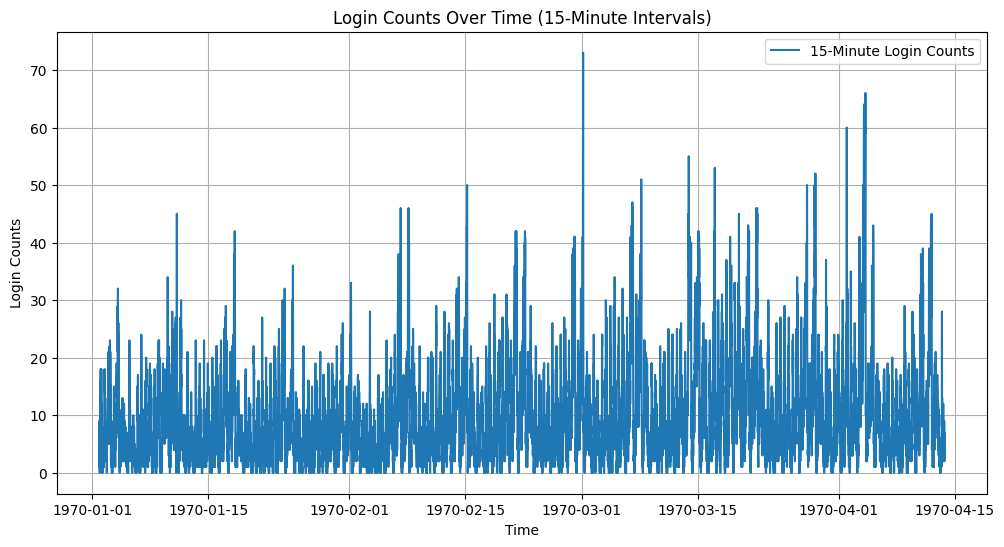

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(login_counts['timestamp'], login_counts['login_count'], label='15-Minute Login Counts')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.title('Login Counts Over Time (15-Minute Intervals)')
plt.legend()
plt.grid()
plt.show()

The data shows that the login process has specific semas through out every 15 day interval.

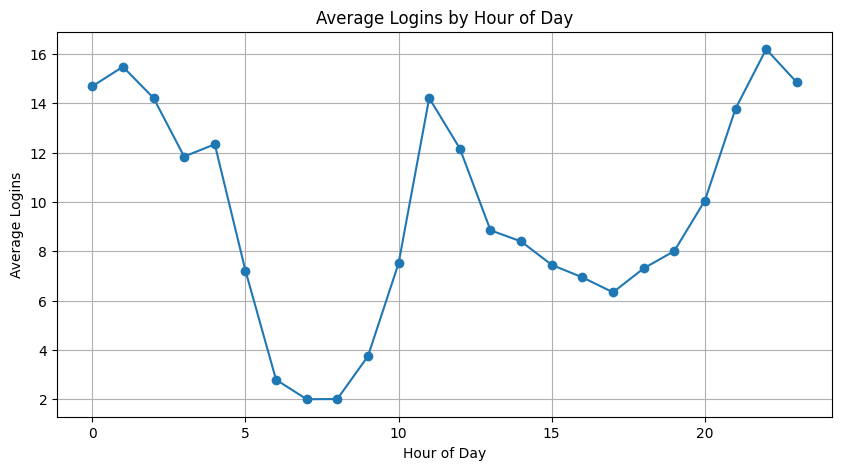

In [11]:
hourly_pattern = login_counts.groupby(login_counts['timestamp'].dt.hour)['login_count'].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o')
plt.title('Average Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Logins')
plt.grid()
plt.show()

In [12]:
login_counts.set_index('timestamp', inplace=True)
decomposition = seasonal_decompose(login_counts['login_count'], model='additive', period=96)  # Assuming 96 intervals per day


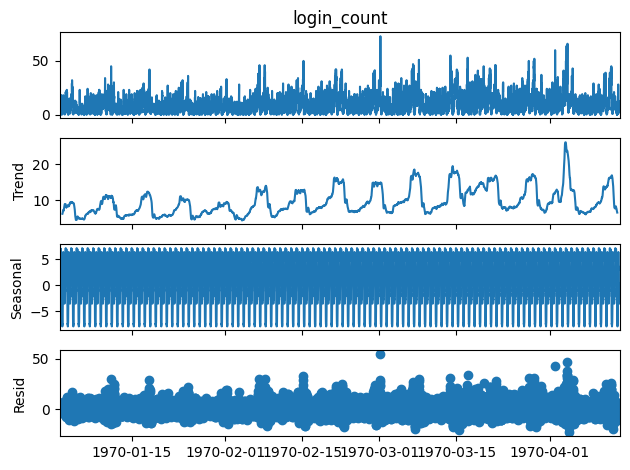

In [13]:
decomposition.plot()
plt.show()

The trends show that there is a season trend thorugh out the day for log in attempts. For daily log in attempts we see that there are about 3 peaks in log in attemps every day. This hits over 14 attempts three times a day.

# **Next portion of the Challenge**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


Part 2 ‐ Experiment and metrics design



1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment?
what statistical test(s) you will conduct to verify the significance of the observation
how you would interpret the results and provide recommendations to the city operations team along with any caveats.



The best way to measure the impact of reimbursing tolls to encourage drivers to cover both cities would be to establish a baseline of how many drivers exclusively cover both cities and how many cover both without the reimbursement in place. Afterward, we would compare the increase in dual-city drivers if it occurs.


We could compare the ride time that customers are waiting for their ride before and after implementing the reimbursement.
Next, we would compare the total earnings for drivers from the period before and after the reimbursement.


We could take a control group of specific drivers to establish a standard revenue stream from working in one city, then take the same control group and measure the revenue of them working in both cities for the same number of hours and compare the revenue stream.


This approach would provide a detailed understanding of whether toll reimbursement is beneficial for dual-city driving.
We would need to compare and analyze weekday versus weekend activity. Additionally, we can cross-compare daytime activity in Metropolis with nighttime activity in Gotham.


To indicate that this would benefit driver rates in both cities, we would need to see an increase in cross-city driving, reduced wait times for customers with higher satisfaction, and an increase in revenue.


#**Predictive Modeling

 **Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your
 approach will suffice). What fraction of the observed users were retained?**

In [14]:
df_2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
#Missing values
df_2.isnull().sum()

,0
city,0
trips_in_first_30_days,0
signup_date,0
avg_rating_of_driver,8122
avg_surge,0
last_trip_date,0
phone,396
surge_pct,0
ultimate_black_user,0
weekday_pct,0


Noted: that there are no missing values in for signup_dates and last_trip_date.

In [16]:
df_2['signup_date'] = pd.to_datetime(df_2['signup_date'])
df_2['last_trip_date'] = pd.to_datetime(df_2['last_trip_date'])

In [17]:
df_2 = df_2.sort_values('signup_date')

**Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.**

In [18]:
df_2['active_in_6th_month'] = (df_2['last_trip_date'] >= df_2['signup_date'] + pd.Timedelta(days=150)).astype(int)

In [19]:
df_2 = pd.get_dummies(df_2, columns=['phone'], drop_first=True)

In [20]:
df_2['avg_rating_of_driver'] = df_2['avg_rating_of_driver'].fillna(df_2['avg_rating_of_driver'].mean())
df_2['avg_rating_by_driver'] = df_2['avg_rating_by_driver'].fillna(df_2['avg_rating_by_driver'].median())


In [21]:
X = df_2.drop(columns=['active_in_6th_month', 'signup_date', 'last_trip_date', 'city'])
y = df_2['active_in_6th_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modeling

In [22]:
Model = RandomForestClassifier(n_estimators=100, random_state=42)
Model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = Model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7567333333333334
Confusion Matrix:
 [[9687 1503]
 [2146 1664]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     11190
           1       0.53      0.44      0.48      3810

    accuracy                           0.76     15000
   macro avg       0.67      0.65      0.66     15000
weighted avg       0.74      0.76      0.75     15000



In [25]:
y_prob = Model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


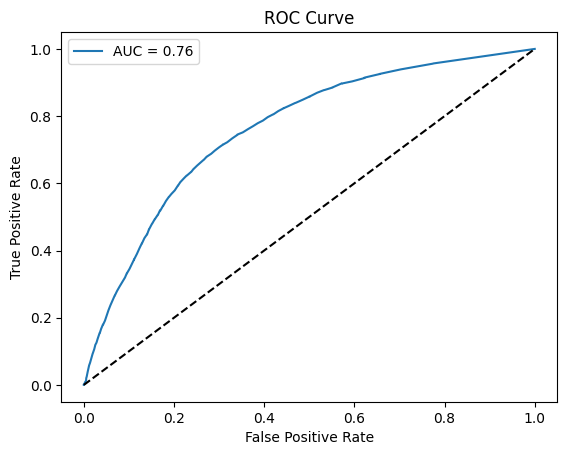

In [26]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
#baseline
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).**

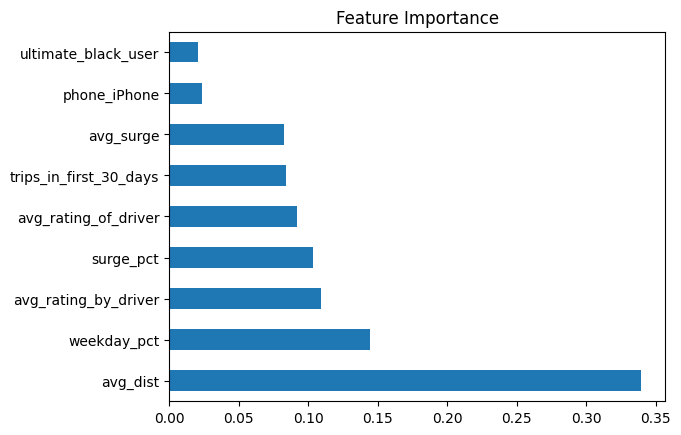

In [27]:
feature_importances = pd.Series(Model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', title='Feature Importance')
plt.show()

Ultimate can leverage incentives for users who are less engaged with the app. Implementing discount incentives or loyalty programs can encourage retention among consistent users.

Monthly event deals can also inspire consistent use of Ultimate, thereby prolonging user retention. This can include a tiered loyalty program that Users can unlock through more use.

There can also be referral bonuses to those who invite their freinds to inspire more people to use Ultimate.